## Default Estimator and WoE Binning

#### Importing Libraries and Setting Up the Environment

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
current_dir = os.getcwd()

# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

# ignore warrnings
import warnings
warnings.filterwarnings("ignore")

### Load datasets

In [2]:
# Load the dataset from the CSV file
df=pd.read_csv('../data/final_df.csv')

In [3]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,...,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId1,ChannelId2,ChannelId3,ChannelId5
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49+00:00,...,0,0,0,0,0,0,0,0,1,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08+00:00,...,0,0,0,0,0,0,0,1,0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21+00:00,...,0,0,0,0,0,0,0,0,1,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55+00:00,...,0,0,0,0,0,1,0,0,1,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21+00:00,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09+00:00,...,0,0,0,0,0,0,0,1,0,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25+00:00,...,0,0,0,0,0,0,0,0,1,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35+00:00,...,0,0,0,0,0,0,0,1,0,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10+00:00,...,0,0,0,0,1,0,0,0,1,0


### Importing RFMS Risk Classifier and Model Evaluator for score calculation and evaluation

In [4]:
# RFMS Risk Classifier for score calculation
from scripts.calculate_RFMS_score import RFMSRiskClassifier  

In [5]:
# Model Evaluator for model evaluation and performance tracking
from scripts.WoE_evaluate import ModelEvaluator  

### Construct the Default Estimator (Proxy)

- Use RFMS scores to create a boundary between "good" (low-risk) and "bad" (high-risk) customers.
- Visualize customer transactions in the RFMS space to understand where to establish the boundary.
- Based on the RFMS score, assign customers to "good" or "bad" risk categories.

#### Running the Risk Classification Model

In [6]:
from datetime import datetime
# Get the current date dynamically in 'YYYY-MM-DD' format for risk classification
current_date = datetime.now().strftime('%Y-%m-%d')

# Instantiate the RFMSRiskClassifier with the processed DataFrame
rfms_classifier = RFMSRiskClassifier(df)

In [7]:
rfms_classifier.calculate_recency(current_date)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Avg_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,ProviderId1,ProviderId2,ProviderId3,ProviderId4,ProviderId5,ProviderId6,ProductId1,ProductId10,ProductId11,ProductId12,ProductId13,ProductId14,ProductId15,ProductId16,ProductId19,ProductId2,ProductId20,ProductId21,ProductId22,ProductId23,ProductId24,ProductId27,ProductId3,ProductId4,ProductId5,ProductId6,ProductId7,ProductId8,ProductId9,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId1,ChannelId2,ChannelId3,ChannelId5,Recency
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2265
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2265
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,2,0,0.183915,0.091958,2,0.000000,2,15,11,2018,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2265
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2265
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,2,0,52.889535,0.092303,573,0.002073,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2175
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2175
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2175
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,2,0,48.240072,0.092061,524,0.000295,10,13,2,2019,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2175


In [8]:
# Step 2: Calculate Frequency
rfms_classifier.calculate_frequency()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Avg_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,ProviderId1,ProviderId2,ProviderId3,ProviderId4,ProviderId5,ProviderId6,ProductId1,ProductId10,ProductId11,ProductId12,ProductId13,ProductId14,ProductId15,ProductId16,ProductId19,ProductId2,ProductId20,ProductId21,ProductId22,ProductId23,ProductId24,ProductId27,ProductId3,ProductId4,ProductId5,ProductId6,ProductId7,ProductId8,ProductId9,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId1,ChannelId2,ChannelId3,ChannelId5,Recency,Frequency
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2265,119
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2265,119
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,2,0,0.183915,0.091958,2,0.000000,2,15,11,2018,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2265,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2265,38
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2265,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,2,0,52.889535,0.092303,573,0.002073,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2175,573
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2175,43
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2175,43
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,2,0,48.240072,0.092061,524,0.000295,10,13,2,2019,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2175,524


In [9]:
# Step 3: Calculate Monetary
rfms_classifier.calculate_monetary()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Avg_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,ProviderId1,ProviderId2,ProviderId3,ProviderId4,ProviderId5,ProviderId6,ProductId1,ProductId10,ProductId11,ProductId12,ProductId13,ProductId14,ProductId15,ProductId16,ProductId19,ProductId2,ProductId20,ProductId21,ProductId22,ProductId23,ProductId24,ProductId27,ProductId3,ProductId4,ProductId5,ProductId6,ProductId7,ProductId8,ProductId9,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId1,ChannelId2,ChannelId3,ChannelId5,Recency,Frequency,Monetary
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2265,119,1302.764769
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2265,119,1302.764769
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,2,0,0.183915,0.091958,2,0.000000,2,15,11,2018,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2265,2,0.367831
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2265,38,133.519452
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2265,38,133.519452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,2,0,52.889535,0.092303,573,0.002073,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2175,573,30305.703513
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2175,43,170.176055
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2175,43,170.176055
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,2,0,48.240072,0.092061,524,0.000295,10,13,2,2019,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2175,524,25277.797807


In [10]:
# Step 4: Calculate Seasonality
rfms_classifier.calculate_seasonality()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Avg_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,ProviderId1,ProviderId2,ProviderId3,ProviderId4,ProviderId5,ProviderId6,ProductId1,ProductId10,ProductId11,ProductId12,ProductId13,ProductId14,ProductId15,ProductId16,ProductId19,ProductId2,ProductId20,ProductId21,ProductId22,ProductId23,ProductId24,ProductId27,ProductId3,ProductId4,ProductId5,ProductId6,ProductId7,ProductId8,ProductId9,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId1,ChannelId2,ChannelId3,ChannelId5,Recency,Frequency,Monetary,Seasonality
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2265,119,1302.764769,4
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2265,119,1302.764769,4
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,2,0,0.183915,0.091958,2,0.000000,2,15,11,2018,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2265,2,0.367831,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2265,38,133.519452,4
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2265,38,133.519452,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,2,0,52.889535,0.092303,573,0.002073,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2175,573,30305.703513,2
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2175,43,170.176055,2
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2175,43,170.176055,2
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,2,0,48.240072,0.092061,524,0.000295,10,13,2,2019,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2175,524,25277.797807,4


In [11]:
# Step 5: Normalize RFMS scores
rfms_classifier.normalize_rfms()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Total_Transaction_Amount,Avg_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Transaction_Hour,Transaction_Day,Transaction_Month,Transaction_Year,ProviderId1,ProviderId2,ProviderId3,ProviderId4,ProviderId5,ProviderId6,ProductId1,ProductId10,ProductId11,ProductId12,ProductId13,ProductId14,ProductId15,ProductId16,ProductId19,ProductId2,ProductId20,ProductId21,ProductId22,ProductId23,ProductId24,ProductId27,ProductId3,ProductId4,ProductId5,ProductId6,ProductId7,ProductId8,ProductId9,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId1,ChannelId2,ChannelId3,ChannelId5,Recency,Frequency,Monetary,Seasonality
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,0.092004,0.000101,2018-11-15 02:18:49,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,0.028851,8.691460e-04,1.000000
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,0.091910,0.000002,2018-11-15 02:19:08,2,0,10.947603,0.091997,119,0.000280,2,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.0,0.028851,8.691460e-04,1.000000
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,0.091958,0.000050,2018-11-15 02:44:21,2,0,0.183915,0.091958,2,0.000000,2,15,11,2018,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,0.000244,1.963558e-07,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0.093750,0.002206,2018-11-15 03:32:55,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1.0,0.009046,8.903414e-05,1.000000
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,0.091853,0.000065,2018-11-15 03:34:21,2,0,3.513670,0.092465,38,0.001578,3,15,11,2018,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.0,0.009046,8.903414e-05,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,0.091820,0.000101,2019-02-13 09:54:09,2,0,52.889535,0.092303,573,0.002073,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.139853,2.021969e-02,0.333333
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,0.092004,0.000101,2019-02-13 09:54:25,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.010269,1.134912e-04,0.333333
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,0.091910,0.000002,2019-02-13 09:54:35,2,0,3.957583,0.092037,43,0.000209,9,13,2,2019,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.010269,1.134912e-04,0.333333
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,0.092188,0.000303,2019-02-13 10:01:10,2,0,48.240072,0.092061,524,0.000295,10,13,2,2019,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,0.127873,1.686511e-02,1.000000


In [12]:
# Step 6: Assign Risk Categories
classified_df=rfms_classifier.assign_risk_category(threshold=0.25)

#### Displaying the Classified DataFrame

In [13]:
# Filter unique CustomerID and keep the first occurrence of all columns
# Print and display the classified DataFrame after running the RFMSRiskClassifier
print("Classified DataFrame:")
classified_df = classified_df[['CustomerId','Recency','Frequency','Monetary','Seasonality','RFMS_score','Risk_category']]
classified_df

Classified DataFrame:


,CustomerId,Recency,Frequency,Monetary,Seasonality,RFMS_score,Risk_category
0,CustomerId_4406,1.0,0.028851,8.691460e-04,1.000000,0.507430,good
1,CustomerId_4406,1.0,0.028851,8.691460e-04,1.000000,0.507430,good
2,CustomerId_4683,1.0,0.000244,1.963558e-07,0.000000,0.250061,good
3,CustomerId_988,1.0,0.009046,8.903414e-05,1.000000,0.502284,good
4,CustomerId_988,1.0,0.009046,8.903414e-05,1.000000,0.502284,good
...,...,...,...,...,...,...,...
95657,CustomerId_3078,0.0,0.139853,2.021969e-02,0.333333,0.123352,bad
95658,CustomerId_3874,0.0,0.010269,1.134912e-04,0.333333,0.085929,bad
95659,CustomerId_3874,0.0,0.010269,1.134912e-04,0.333333,0.085929,bad
95660,CustomerId_1709,0.0,0.127873,1.686511e-02,1.000000,0.286184,good


In [14]:
classified_df = classified_df.groupby('CustomerId', as_index=False).first()
classified_df

,CustomerId,Recency,Frequency,Monetary,Seasonality,RFMS_score,Risk_category
0,CustomerId_1,0.933333,0.000000,1.165134e-08,0.000000,0.233333,bad
1,CustomerId_10,0.933333,0.000000,1.165134e-08,0.000000,0.233333,bad
2,CustomerId_1001,0.988889,0.000978,1.490145e-06,0.000000,0.247467,bad
3,CustomerId_1002,1.000000,0.002445,7.373857e-06,0.666667,0.417280,good
4,CustomerId_1003,0.133333,0.001222,2.165923e-06,0.000000,0.033639,bad
...,...,...,...,...,...,...,...
3737,CustomerId_992,0.055556,0.001222,2.165923e-06,0.000000,0.014195,bad
3738,CustomerId_993,0.288889,0.000978,1.490145e-06,0.000000,0.072467,bad
3739,CustomerId_994,1.000000,0.024450,6.288739e-04,1.000000,0.506270,good
3740,CustomerId_996,0.755556,0.003912,1.781815e-05,0.000000,0.189871,bad


#### Counting the Risk Categories in the Classified DataFrame

In [15]:
# Display the count of each risk category in the classified DataFrame
classified_df.Risk_category.value_counts()

Risk_category
bad     2728
good    1014
Name: count, dtype: int64

#### Visualizing User Segmentation in RFMS Space

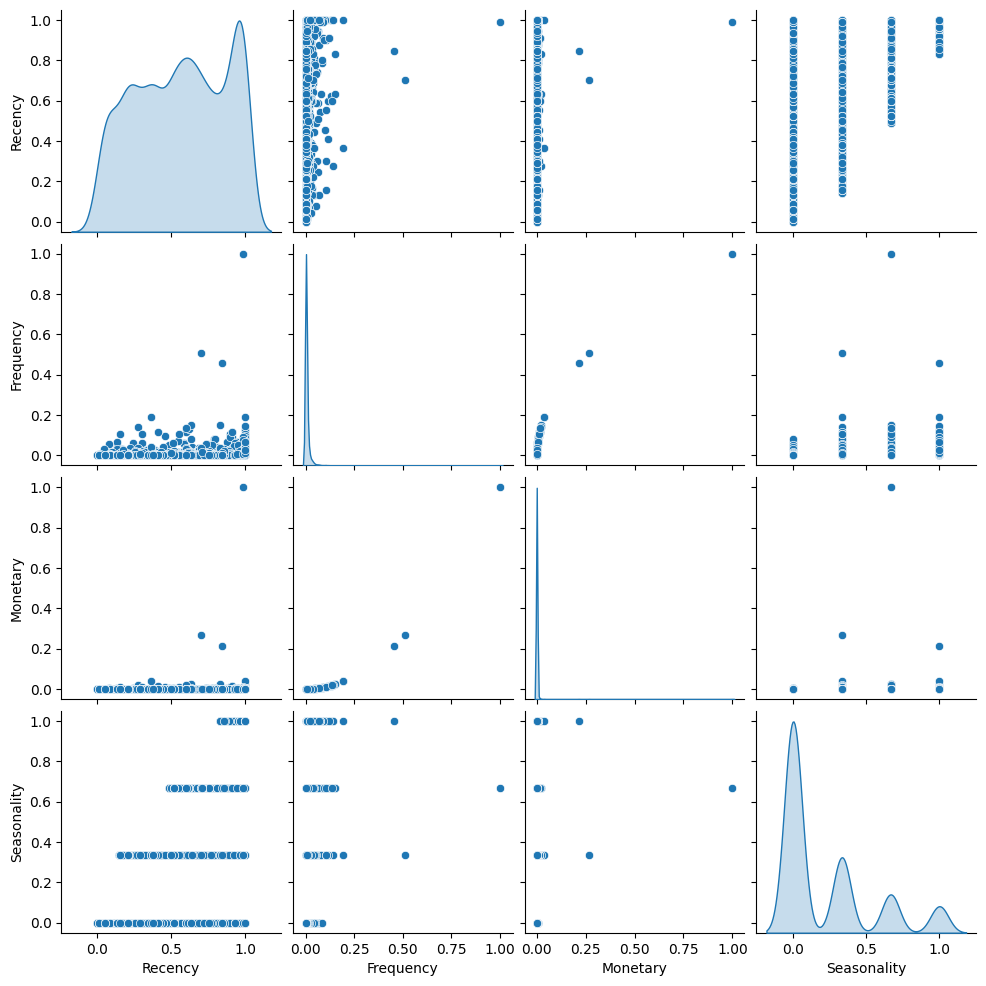

In [16]:
# We have RFMS columns: 'Recency', 'Frequency', 'Monetary', 'Seasonality'
# Create a pairplot to visualize the relationships between these RFMS features in the classified DataFrame
sns.pairplot(classified_df[['Recency', 'Frequency', 'Monetary', 'Seasonality']], diag_kind='kde')

# Display the plot
plt.show()

In [17]:
# Group by CustomerId, keeping the first occurrence of all columns and max of 'FraudResult'
df = df.groupby('CustomerId', as_index=False).agg({
    'Total_Transaction_Amount':'first',
    'Avg_Transaction_Amount':'first',
    'Transaction_Count':'first', 
    'Std_Transaction_Amount':'first',
    'Amount': 'first',
    'Value': 'first',
    'PricingStrategy': 'first',
    'ChannelId1':'first',
    'ChannelId2':'first',
    'ChannelId3':'first',
    'ChannelId5':'first',
    'FraudResult': 'max'  # Keep the maximum value of FraudResult
})

In [18]:
# Merge transactional and RFMS score dataset 
rfms_df =classified_df[['CustomerId','Risk_category']]
merged_df = pd.merge(df, rfms_df, on='CustomerId', how='inner')
merged_df

,CustomerId,Total_Transaction_Amount,Avg_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Amount,Value,PricingStrategy,ChannelId1,ChannelId2,ChannelId3,ChannelId5,FraudResult,Risk_category
0,CustomerId_1,0.090993,0.090993,1,0.001658,0.090993,0.001012,4,0,1,0,0,0,bad
1,CustomerId_10,0.090993,0.090993,1,0.001658,0.090993,0.001012,4,0,1,0,0,0,bad
2,CustomerId_1001,0.461397,0.092279,5,0.000603,0.092831,0.001012,2,0,0,1,0,0,bad
3,CustomerId_1002,1.011418,0.091947,11,0.000052,0.092050,0.000152,4,0,0,1,0,0,good
4,CustomerId_1003,0.553309,0.092218,6,0.000554,0.092831,0.001012,2,0,0,1,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,0.553309,0.092218,6,0.000560,0.092831,0.001012,2,0,0,1,0,0,bad
3738,CustomerId_993,0.461397,0.092279,5,0.000620,0.092831,0.001012,2,0,0,1,0,0,bad
3739,CustomerId_994,9.333077,0.092407,101,0.001360,0.092004,0.000101,2,0,0,1,0,0,good
3740,CustomerId_996,1.575276,0.092663,17,0.000407,0.092831,0.001012,2,0,0,1,0,0,bad


In [19]:
# Save the resulting merged DataFrame to a CSV file
merged_df.to_csv('../data/final_merged_data.csv', index=False)

### Perform Weight of Evidence (WoE) Binning

- Apply WoE binning to better separate customers into risk categories based on their RFMS scores.
- WoE binning helps identify which groups of RFMS scores are more strongly associated with default risk.

In [20]:
import scorecardpy as sc
final_merged_df = pd.read_csv('../data/final_merged_data.csv')
final_merged_df

,CustomerId,Total_Transaction_Amount,Avg_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Amount,Value,PricingStrategy,ChannelId1,ChannelId2,ChannelId3,ChannelId5,FraudResult,Risk_category
0,CustomerId_1,0.090993,0.090993,1,0.001658,0.090993,0.001012,4,0,1,0,0,0,bad
1,CustomerId_10,0.090993,0.090993,1,0.001658,0.090993,0.001012,4,0,1,0,0,0,bad
2,CustomerId_1001,0.461397,0.092279,5,0.000603,0.092831,0.001012,2,0,0,1,0,0,bad
3,CustomerId_1002,1.011418,0.091947,11,0.000052,0.092050,0.000152,4,0,0,1,0,0,good
4,CustomerId_1003,0.553309,0.092218,6,0.000554,0.092831,0.001012,2,0,0,1,0,0,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,CustomerId_992,0.553309,0.092218,6,0.000560,0.092831,0.001012,2,0,0,1,0,0,bad
3738,CustomerId_993,0.461397,0.092279,5,0.000620,0.092831,0.001012,2,0,0,1,0,0,bad
3739,CustomerId_994,9.333077,0.092407,101,0.001360,0.092004,0.000101,2,0,0,1,0,0,good
3740,CustomerId_996,1.575276,0.092663,17,0.000407,0.092831,0.001012,2,0,0,1,0,0,bad


In [21]:
df.columns

Index(['CustomerId', 'Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Transaction_Count', 'Std_Transaction_Amount', 'Amount', 'Value', 'PricingStrategy', 'ChannelId1', 'ChannelId2', 'ChannelId3', 'ChannelId5', 'FraudResult'], dtype='object')

In [22]:
# lable encode risk_catagory
def labelencoder(self):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder() 
    self['Risk_category']= label_encoder.fit_transform(self['Risk_category'])
    return self

final_merged_df=labelencoder(final_merged_df)

In [23]:
final_merged_df.drop(['CustomerId'], axis=1, inplace=True)

##### Displaying Weight of Evidence (WoE) Results

In [24]:
evaluater = ModelEvaluator(final_merged_df, 'Risk_category')

In [25]:
breaks = evaluater.woe_num()
print("Calculated breaks:", breaks)

Calculated breaks: {'Total_Transaction_Amount': [np.float64(0.6486305296421051), np.float64(0.926930159330368), np.float64(1.6230948567390442), np.float64(2.394973874092102)], 'Avg_Transaction_Amount': [np.float64(0.09195974096655846), np.float64(0.09236636385321617), np.float64(0.09237270802259445), np.float64(0.0928308367729187)], 'Transaction_Count': [np.float64(6.5), np.float64(10.5), np.float64(17.5), np.float64(32.5)], 'Std_Transaction_Amount': [np.float64(0.0005907084851060063), np.float64(0.0007502794032916427), np.float64(0.0016506845713593066), np.float64(0.0016651013866066933)]}


[INFO] creating woe binning ...


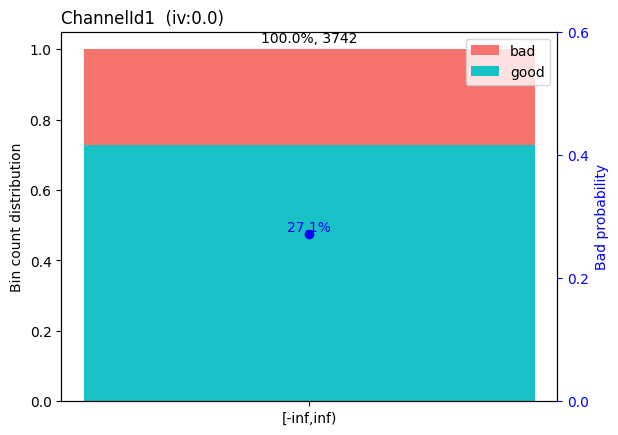

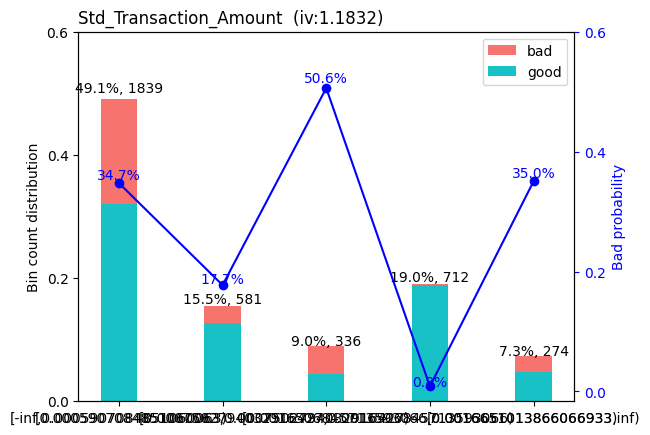

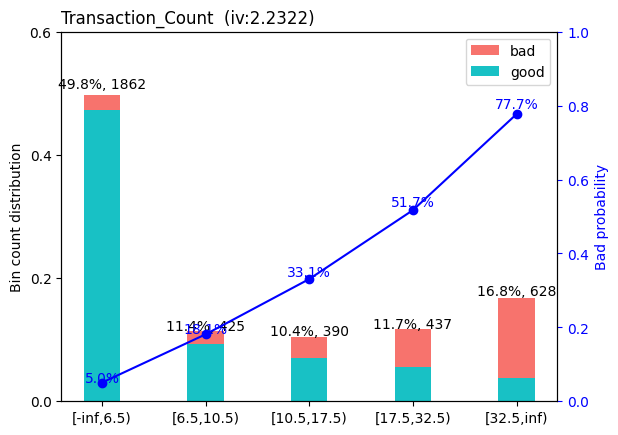

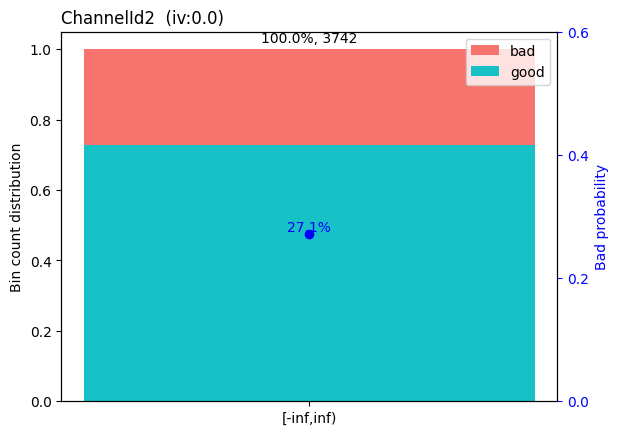

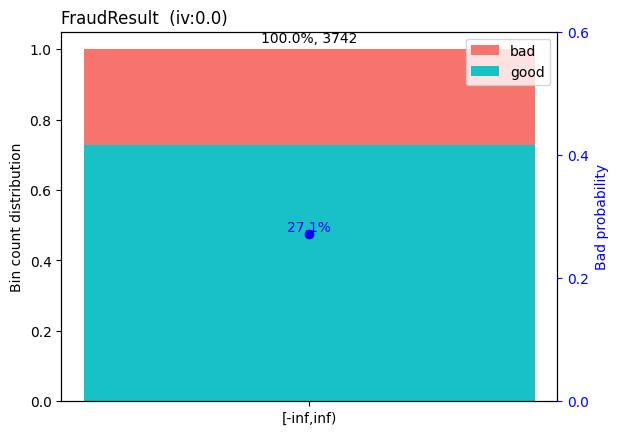

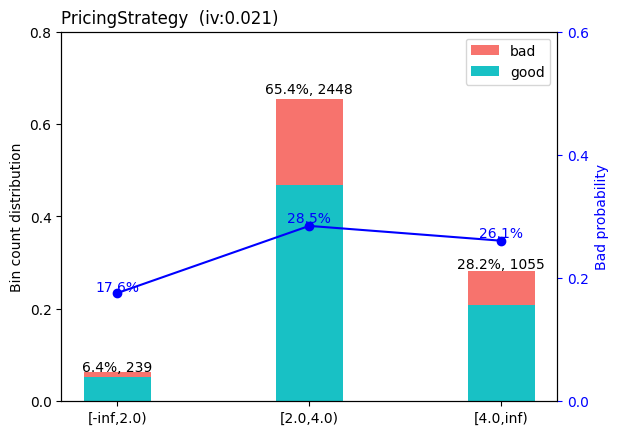

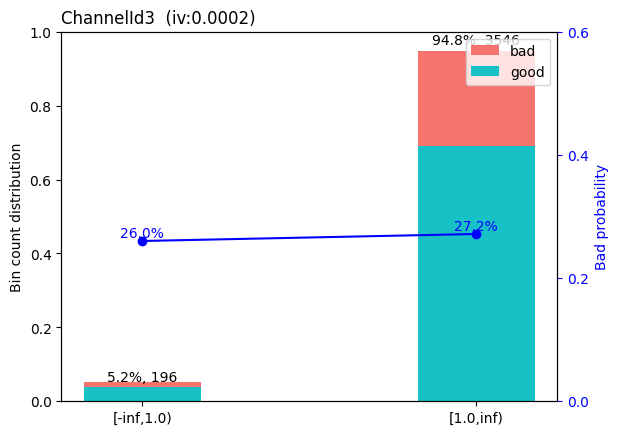

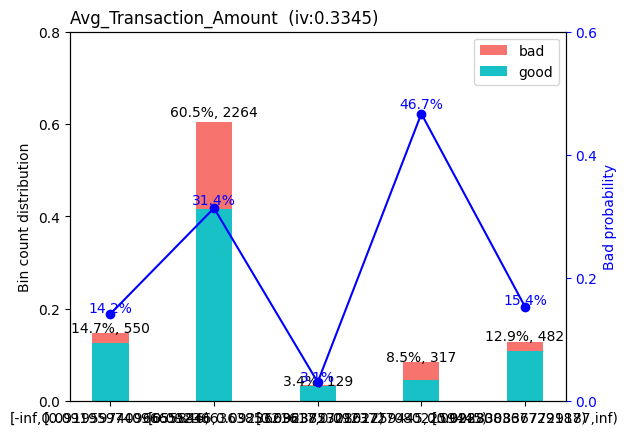

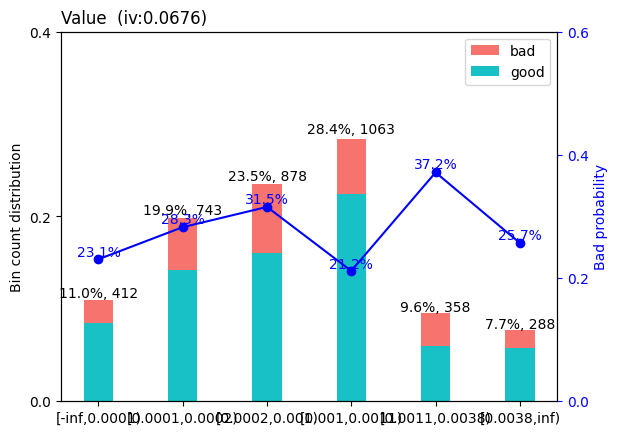

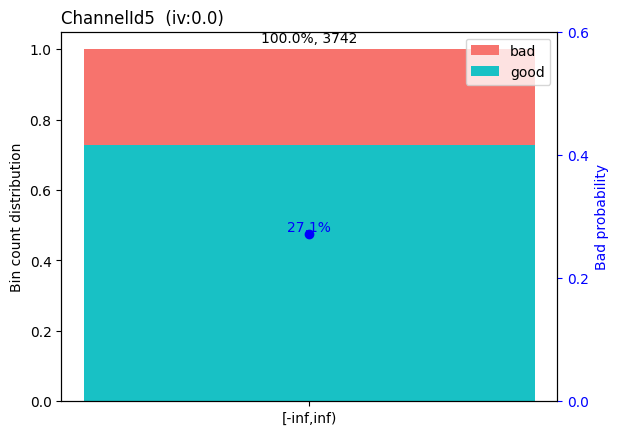

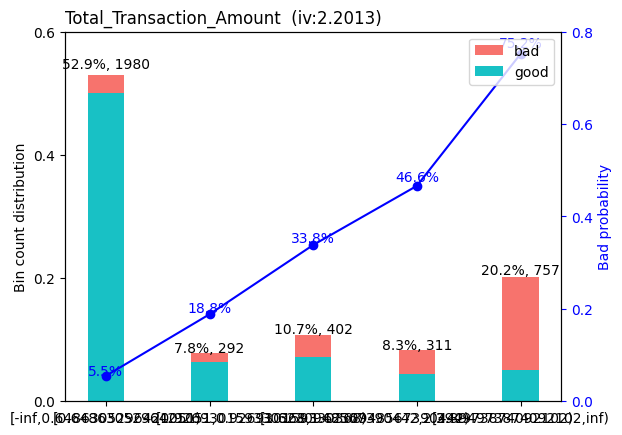

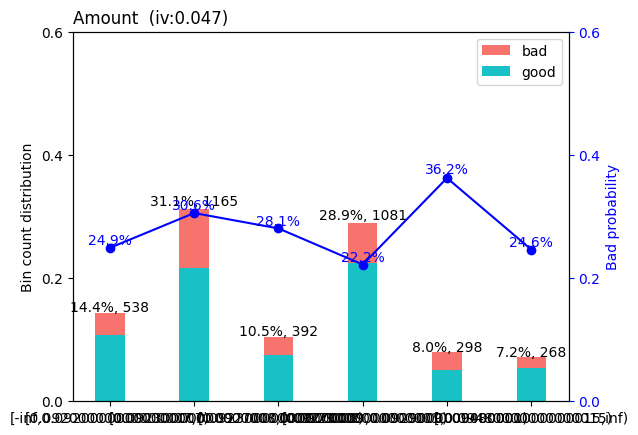

In [26]:
evaluater.adjust_woe()

#### WoE Transformation

To apply the WoE transformation to the `final_merged_df` DataFrame, we will use the `woeval` method from the `ModelEvaluator` class. This method applies the WoE transformation based on the calculated breaks from the `woe_num` method.

In [27]:
final_merged_df

,Total_Transaction_Amount,Avg_Transaction_Amount,Transaction_Count,Std_Transaction_Amount,Amount,Value,PricingStrategy,ChannelId1,ChannelId2,ChannelId3,ChannelId5,FraudResult,Risk_category
0,0.090993,0.090993,1,0.001658,0.090993,0.001012,4,0,1,0,0,0,0
1,0.090993,0.090993,1,0.001658,0.090993,0.001012,4,0,1,0,0,0,0
2,0.461397,0.092279,5,0.000603,0.092831,0.001012,2,0,0,1,0,0,0
3,1.011418,0.091947,11,0.000052,0.092050,0.000152,4,0,0,1,0,0,1
4,0.553309,0.092218,6,0.000554,0.092831,0.001012,2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,0.553309,0.092218,6,0.000560,0.092831,0.001012,2,0,0,1,0,0,0
3738,0.461397,0.092279,5,0.000620,0.092831,0.001012,2,0,0,1,0,0,0
3739,9.333077,0.092407,101,0.001360,0.092004,0.000101,2,0,0,1,0,0,1
3740,1.575276,0.092663,17,0.000407,0.092831,0.001012,2,0,0,1,0,0,0


In [28]:
# Apply WoE transformation
woeval_df = evaluater.woeval(final_merged_df)
woeval_df

[INFO] creating woe binning ...
[INFO] converting into woe values ...


,Risk_category,ChannelId1_woe,Std_Transaction_Amount_woe,Transaction_Count_woe,ChannelId2_woe,FraudResult_woe,PricingStrategy_woe,ChannelId3_woe,Avg_Transaction_Amount_woe,Value_woe,ChannelId5_woe,Total_Transaction_Amount_woe,Amount_woe
0,0,0.0,-3.778190,-1.944644,0.0,0.0,-0.052857,-0.055242,-0.810604,-0.325252,0.0,-1.853215,-0.113909
1,0,0.0,-3.778190,-1.944644,0.0,0.0,-0.052857,-0.055242,-0.810604,-0.325252,0.0,-1.853215,-0.113909
2,0,0.0,-0.545216,-1.944644,0.0,0.0,0.068509,0.003012,0.206343,-0.325252,0.0,-1.853215,-0.264287
3,1,0.0,0.359493,0.284958,0.0,0.0,-0.052857,0.003012,-0.810604,0.058252,0.0,0.318824,0.168798
4,0,0.0,0.359493,-1.944644,0.0,0.0,0.068509,0.003012,0.206343,-0.325252,0.0,-1.853215,-0.264287
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3737,0,0.0,0.359493,-1.944644,0.0,0.0,0.068509,0.003012,0.206343,-0.325252,0.0,-1.853215,-0.264287
3738,0,0.0,-0.545216,-1.944644,0.0,0.0,0.068509,0.003012,0.206343,-0.325252,0.0,-1.853215,-0.264287
3739,1,0.0,1.013476,2.238339,0.0,0.0,0.068509,0.003012,0.856979,0.058252,0.0,2.097104,0.168798
3740,0,0.0,0.359493,0.284958,0.0,0.0,0.068509,0.003012,0.856979,-0.325252,0.0,0.318824,-0.264287


#### Displaying Information Value (IV)

In [29]:
# Print the Information Value (IV) to assess the predictive power of the features
print(f"\nInformation Value (IV):")
# Step 7: Calculate WoE and IV for a specific feature
# Calculate IV for each relevant transactional column
transactional_columns = merged_df.columns.difference(['Risk_category'])  # Example columns
# Initialize an empty list to store results
results = []

# Loop through each feature and calculate WoE and IV
for feature in transactional_columns:
    info_values = rfms_classifier.calculate_woe_iv(merged_df, feature, 'Risk_category')  # Adjust target as necessary
    
    if info_values is not None:
        # Append the result to the results list
        results.append(info_values)

# Concatenate all results into a single DataFrame if results are not empty
if results:
    final_results = pd.concat(results, ignore_index=True)
    # Display the final IV results and make ascending false
    final_results = final_results.sort_values(by='IV', ascending=False)
    print(final_results)
else:
    print("No valid WoE and IV values calculated.")


Information Value (IV):
No valid WoE and IV values calculated.


In [30]:
print("Columns in final_merged_df:", final_merged_df.columns)
print("Columns in woeval_df:", woeval_df.columns)

Columns in final_merged_df: Index(['Total_Transaction_Amount', 'Avg_Transaction_Amount', 'Transaction_Count', 'Std_Transaction_Amount', 'Amount', 'Value', 'PricingStrategy', 'ChannelId1', 'ChannelId2', 'ChannelId3', 'ChannelId5', 'FraudResult', 'Risk_category'], dtype='object')
Columns in woeval_df: Index(['Risk_category', 'ChannelId1_woe', 'Std_Transaction_Amount_woe', 'Transaction_Count_woe', 'ChannelId2_woe', 'FraudResult_woe', 'PricingStrategy_woe', 'ChannelId3_woe', 'Avg_Transaction_Amount_woe', 'Value_woe', 'ChannelId5_woe', 'Total_Transaction_Amount_woe', 'Amount_woe'], dtype='object')


In [31]:
import pandas as pd

# Assuming final_merged_df and woeval_df are already defined as pandas DataFrames

# Merge the two dataframes on 'Risk_category' using an inner join
cleaned_df = pd.merge(final_merged_df, woeval_df, on='Risk_category', how='inner')

# Display the first few rows of the merged dataframe
print(merged_df.head())


        CustomerId  Total_Transaction_Amount  Avg_Transaction_Amount  Transaction_Count  Std_Transaction_Amount    Amount     Value  PricingStrategy  ChannelId1  ChannelId2  ChannelId3  ChannelId5  FraudResult Risk_category
0     CustomerId_1                  0.090993                0.090993                  1                0.001658  0.090993  0.001012                4           0           1           0           0            0           bad
1    CustomerId_10                  0.090993                0.090993                  1                0.001658  0.090993  0.001012                4           0           1           0           0            0           bad
2  CustomerId_1001                  0.461397                0.092279                  5                0.000603  0.092831  0.001012                2           0           0           1           0            0           bad
3  CustomerId_1002                  1.011418                0.091947                 11                0

#### Saving the Merged Data to CSV

In [ ]:
# save merged data
file_path='../data'
rfms_classifier.save_merged_data(cleaned_df, output_file='cleand_data', file_path=file_path)

### RFMS Risk Classification with WoE Binning

This notebook implements an RFMS (Recency, Frequency, Monetary, Seasonality) model for customer risk classification and applies Weight of Evidence (WoE) binning to assess risk categories.

## Key Steps:

1. **Feature Calculation:**
   - **Recency**: Days since last transaction.
   - **Frequency**: Number of transactions per customer.
   - **Monetary**: Total transaction amount per customer.
   - **Seasonality**: Unique months of customer transactions.

2. **RFMS Normalization:**
   - Normalize RFMS features for consistency.

3. **Risk Classification:**
   - Calculate an RFMS score and classify customers as 'good' or 'bad' based on a threshold.

4. **WoE Binning & IV Calculation:**
   - Perform WoE binning for risk segmentation.
   - Calculate Information Value (IV) to evaluate feature predictive power.

5. **Data Export:**
   - Save the final classified dataset as a CSV.

### Conclusion:
The RFMS model, combined with WoE binning, provides a method to classify customers based on their transaction behavior and determine their risk level, aiding in better decision-making.
